# Exploratory Data Analysis

The dataset has the following features: 

    a) serial_number: Unique identifier for each variable
    b) time_stamp: Date at which the data was captured
    c) opening_value: Opening value for the specified date
    d) highest_value: Highest value of the index attained at the specific date
    e) lowest_value: Lowest value of the index for the specific date
    f) settle_value: Settle value for the day
    g) volume_sell: Volume of indices sold

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from datetime import datetime

print("Libraries imported successfully")

Libraries imported successfully


For doing most of our operations, we need to import and read our datasets. In this notebook, we are going to be using pre-provided datasets which denote share market data.

In [2]:
import io
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
# Dataset is now stored in a Pandas dataframe

Now, we have stored this data in a Pandas DataFrame object. These are object defined in the Pandas module which are a higher level functionality of multiple libraries including Numpy. Thus, our work with Pandas will be more efficient when there is a need to edit manually using Numpy.

Let us try to see what our data looks like. An overlooked aspect of machine learning and deep learning is to use our own personal neural network in our brain before starting off with general procedure. To have great analyses, we need to dig deep and get dirty with the datasets.

In [3]:
train.tail()

,serial_number,time_stamp,opening_value,highest_value,lowest_value,settle_value,volume_sell
1049,1050,2013-09-13,573.5,573.5,573.5,573.5,0
1050,1051,2013-09-12,576.5,576.5,576.5,576.5,0
1051,1052,2013-09-11,576.5,576.5,576.5,576.5,0
1052,1053,2013-09-10,578.0,578.0,578.0,578.0,0
1053,1054,2013-09-09,569.0,569.0,569.0,569.0,0


In [4]:
test.head(10)

,serial_number,time_stamp,opening_value,highest_value,lowest_value,settle_value
0,1,2018-12-13,788.5,788.5,788.5,783.5
1,2,2018-12-12,0.0,0.0,0.0,787.0
2,3,2018-12-11,766.0,766.0,764.2,772.4
3,4,2018-12-10,765.2,765.2,753.4,752.6
4,5,2018-12-07,773.0,786.1,773.0,776.7
5,6,2018-12-06,776.9,778.6,765.6,766.3
6,7,2018-12-05,800.3,804.0,799.5,800.7
7,8,2018-12-04,815.5,816.9,797.3,810.1
8,9,2018-12-03,812.6,817.8,812.6,814.0
9,10,2018-11-30,787.5,788.7,783.6,789.6


On importing the datasets and checking first 10 entries each with the head() function, we can see the attributes and already have our first glance at the given data. We can see that there are certain attributes which have zero values for certain entries thus we need to check for null values and missing data.

First we shall seperate out the feature time_stamp into 4 seperate features to give us year, day and month seperately. We will also use the datetime module to get the weekday of each date.

In [5]:
# Dataframe_name["column_name"]
train['time_stamp'] = pd.to_datetime(train.time_stamp,format='%Y-%m-%d')
train['Day'] = train['time_stamp'].dt.dayofweek
train.drop(['time_stamp'],axis=1)

train['year']=train.time_stamp.dt.year 
train['month']=train.time_stamp.dt.month 
train['day']=train.time_stamp.dt.day

train = train.drop(columns = ["time_stamp"])

train.head()

,serial_number,opening_value,highest_value,lowest_value,settle_value,volume_sell,Day,year,month,day
0,1,0.0,0.0,0.0,896.5,1212,4,2017,10,13
1,2,892.5,892.5,892.5,892.5,304,3,2017,10,12
2,3,894.0,894.0,894.0,892.5,25,2,2017,10,11
3,4,891.5,896.5,891.5,896.5,298,1,2017,10,10
4,5,0.0,0.0,0.0,885.0,188,0,2017,10,9


We thus implement the forementioned and check for the updates we have created. As can be seen from the train.head(), the time_stamp attribute is now replaced by year, day, Day, and month.

We now look for other features which can be obtained. As is commonly used, we obtain the ratio of (Closing Value - Opening Value)/Closing Value and store it in a new column called 'rat' short for ratio. Here as we do not have it explicitly mentioned, we assume the settle value is the settlement price which is another name for closing value. Thus we obtain the following:

In [6]:
train['rat']=((train['settle_value']-train['opening_value'])/train['settle_value']) 

We now seperate the training set into X, a dataframe of training attributes and Y, the desired output function.

In [7]:
X=train.drop(['volume_sell'],axis=1)
y=train['volume_sell']

We shall now look at the description and meta-information of the train dataset to further understand the balancing, distribution and correlation of the data.

In [8]:
train.describe()

,serial_number,opening_value,highest_value,lowest_value,settle_value,volume_sell,Day,year,month,day,rat
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,473.843600,473.900526,473.768647,630.395307,395.868121,2.024668,2015.229602,6.560721,15.710626,0.238131
std,304.407895,274.333981,274.393510,274.253047,84.393436,2274.875290,1.439953,1.223557,3.427393,8.738620,0.426156
min,1.000000,0.000000,0.000000,0.000000,465.500000,0.000000,0.000000,2013.000000,1.000000,1.000000,-0.020525
25%,264.250000,497.500000,497.500000,497.500000,571.000000,0.000000,1.000000,2014.000000,4.000000,8.000000,0.000000
50%,527.500000,580.500000,580.500000,580.500000,613.500000,0.000000,2.000000,2015.000000,7.000000,16.000000,0.000000
75%,790.750000,634.500000,634.500000,634.500000,662.500000,0.000000,3.000000,2016.000000,9.000000,23.000000,0.005231
max,1054.000000,894.000000,896.500000,894.000000,896.500000,44867.000000,6.000000,2017.000000,12.000000,31.000000,1.000000


After these changes, we shall now check the dataset again and how all attributes are arranged in the data by checking the head and tail of the training dataset.

In [9]:
train.head()

,serial_number,opening_value,highest_value,lowest_value,settle_value,volume_sell,Day,year,month,day,rat
0,1,0.0,0.0,0.0,896.5,1212,4,2017,10,13,1.000000
1,2,892.5,892.5,892.5,892.5,304,3,2017,10,12,0.000000
2,3,894.0,894.0,894.0,892.5,25,2,2017,10,11,-0.001681
3,4,891.5,896.5,891.5,896.5,298,1,2017,10,10,0.005577
4,5,0.0,0.0,0.0,885.0,188,0,2017,10,9,1.000000


In [10]:
train.tail()

,serial_number,opening_value,highest_value,lowest_value,settle_value,volume_sell,Day,year,month,day,rat
1049,1050,573.5,573.5,573.5,573.5,0,4,2013,9,13,0.0
1050,1051,576.5,576.5,576.5,576.5,0,3,2013,9,12,0.0
1051,1052,576.5,576.5,576.5,576.5,0,2,2013,9,11,0.0
1052,1053,578.0,578.0,578.0,578.0,0,1,2013,9,10,0.0
1053,1054,569.0,569.0,569.0,569.0,0,0,2013,9,9,0.0


We shall also see the dimension of the given dataset.

In [11]:
train.shape

(1054, 11)

The features are all enlisted as:

In [12]:
features = train.select_dtypes(include=[np.number,np.object])
features.columns

Index(['serial_number', 'opening_value', 'highest_value', 'lowest_value',
       'settle_value', 'volume_sell', 'Day', 'year', 'month', 'day', 'rat'],
      dtype='object')

We can now check for skewness and see which attributes are positively skewed to the data and which are negatively skewed:

In [13]:
train.skew()

serial_number     0.000000
opening_value    -0.979176
highest_value    -0.978403
lowest_value     -0.980336
settle_value      1.055431
volume_sell      11.301459
Day               0.073426
year             -0.058495
month            -0.052523
day               0.022370
rat               1.231250
dtype: float64

Thus, it is seen that 5 attributes are negatively skewed and all the others are positively skewed.

In [14]:
train.kurt()

serial_number     -1.200000
opening_value     -0.617539
highest_value     -0.617524
lowest_value      -0.617807
settle_value       0.723345
volume_sell      170.167667
Day               -1.125307
year              -1.061173
month             -1.211680
day               -1.181333
rat               -0.484872
dtype: float64

We see in our output function that kurtosis is 170.167667 which indicates it has a very sharp frequency curve thus making it a highly imbalanced function. To check we shall take the value count of the output function volume_sell.

In [15]:
train['volume_sell'].value_counts()

0       816
5        10
12        6
6         6
20        4
       ... 
304       1
305       1
330       1
339       1
1920      1
Name: volume_sell, Length: 192, dtype: int64

We can see that volume_sell has a value of zero 816 times and multiple other values in other cases. Now we can see the distribution of the data:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='volume_sell'>

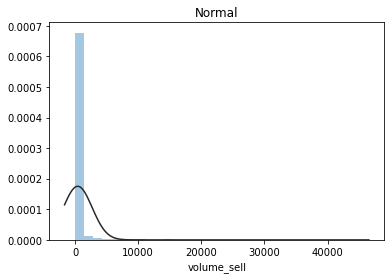

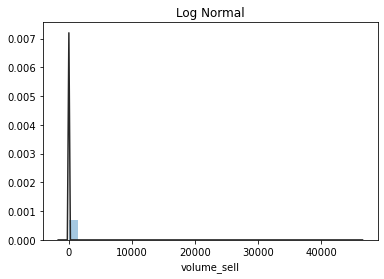

In [16]:
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

The output function volume_sell can be seen to be highly imbalanced in the following function. We thus need to take measures in our model while predicting our observations as this imbalance might cause the model to make one sided predictions and create false negatives.

We see the normal and log-normal distribution of data. We can see the skewness pictorially:

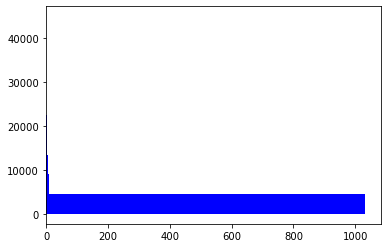

In [17]:
plt.hist(train['volume_sell'],orientation = 'horizontal',histtype = 'bar', color ='blue')
plt.show()

We can now check correlations by plotting them pairwise to check their correlations graphically and see the general trend of data.

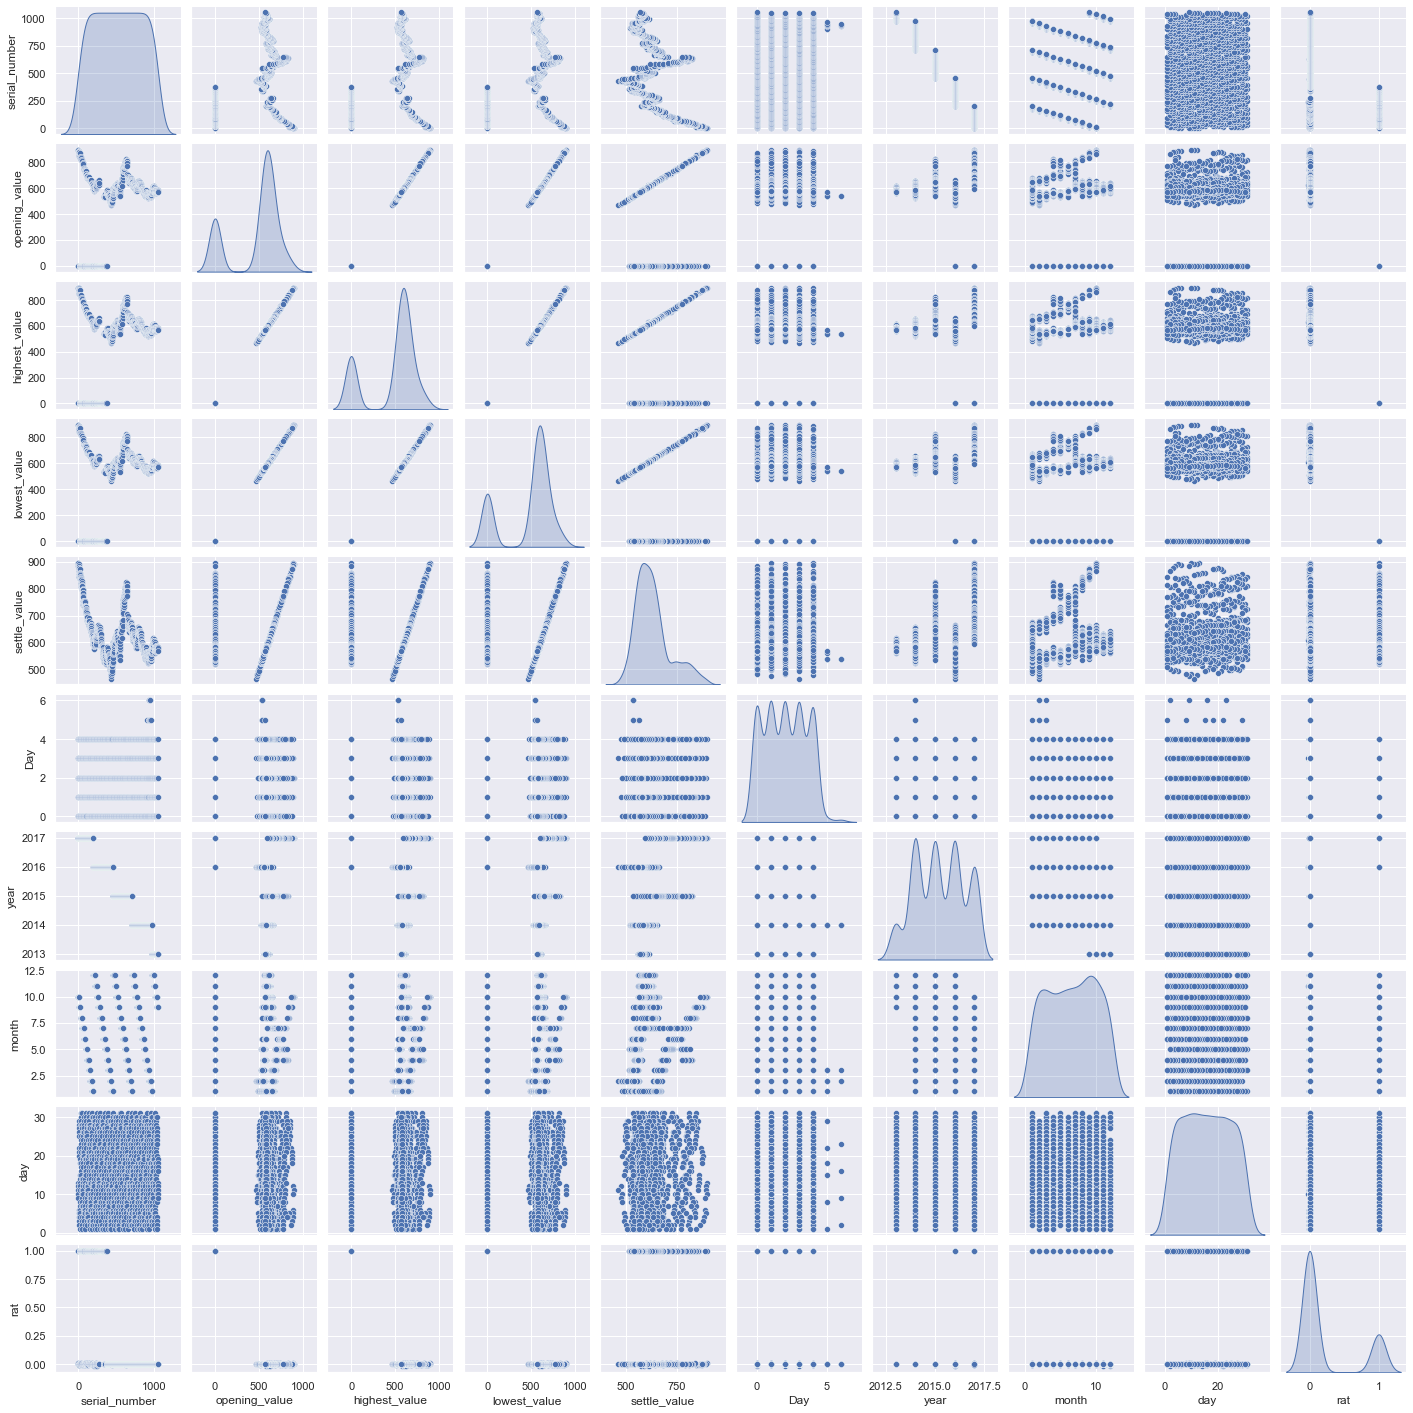

In [18]:
sns.set()
columns = X.columns
sns.pairplot(train[columns],height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

As it is a time series model we shall be incorporating serial_number into our model as a measure of time as it is continuous. The serial numbers of test dataset for prediction purposes have been inserted in continuation due to the format of the time series model.

Conclusion: Thus we have seen that 5 new features, rat, year, day, month, Day have been added and our data has to be dealt with for imbalance in our model.